#Develop a Flask-based sentiment analysis tool that takes user-generated text as input and predicts early detection of postpartum depression symptoms
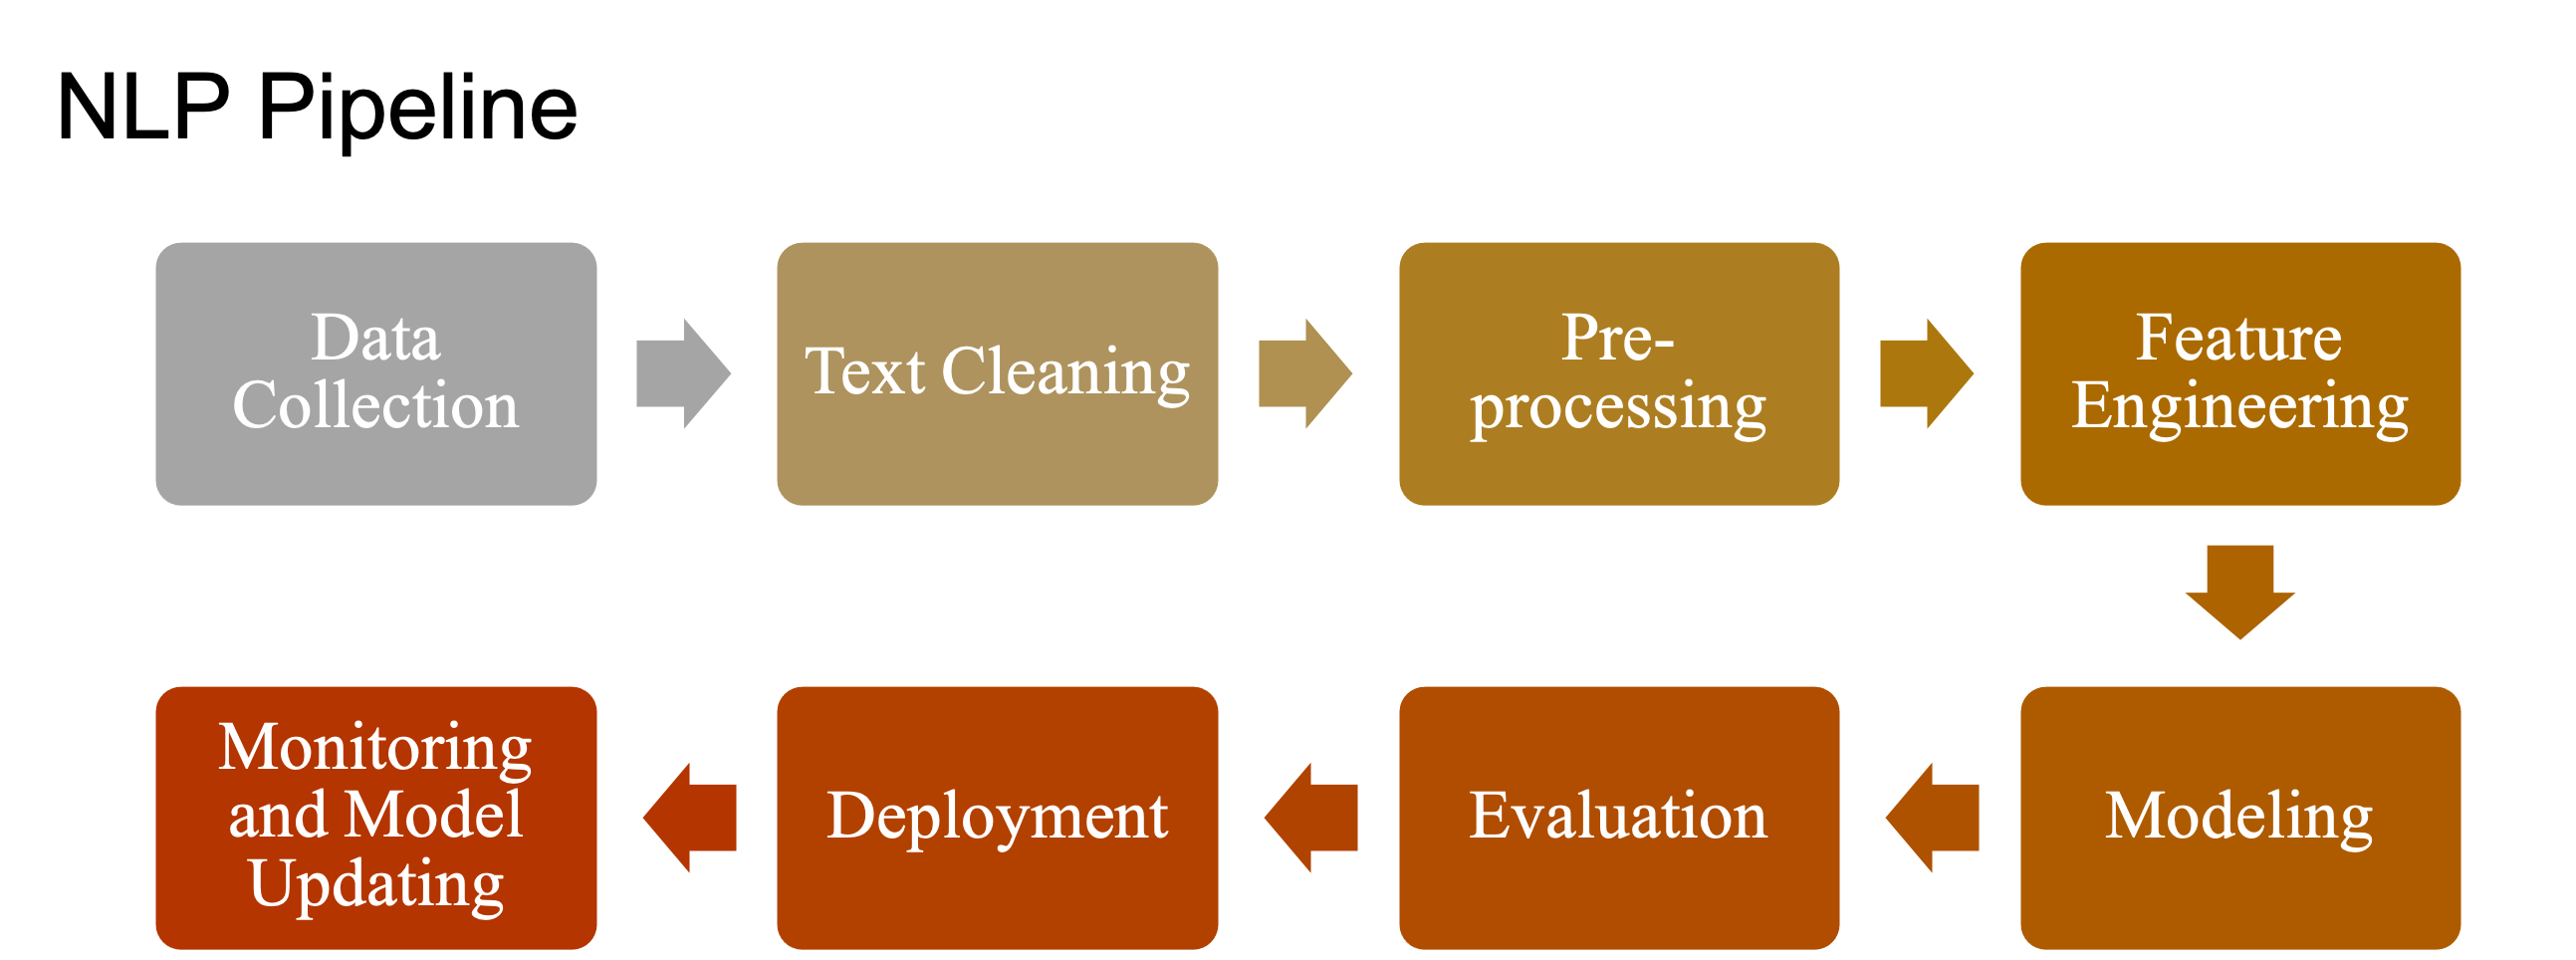

#Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeClassifier, Perceptron, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset

In [3]:

data = pd.read_csv('/content/post natal data.csv')

In [4]:
data.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [5]:
data.shape

(1503, 11)

In [6]:
data.columns

Index(['Timestamp', 'Age', 'Feeling sad or Tearful',
       'Irritable towards baby & partner', 'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling anxious', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt'],
      dtype='object')

#balance check

In [7]:
data['Suicide attempt'].value_counts()

No                       709
Yes                      459
Not interested to say    335
Name: Suicide attempt, dtype: int64

In [8]:
#duplicate_rows = data[data.duplicated()]

# Check if there are any duplicate rows
#if not duplicate_rows.empty:
   # print("Duplicate rows found:")
  #  print(duplicate_rows)
#else:
  #  print("No duplicate rows found.")

In [9]:
# Remove duplicate rows and update the DataFrame
#data = data.drop_duplicates()

# Optionally, you can reset the index if you want a continuous index
#data = data.reset_index(drop=True)

#data details

In [10]:
# Rename columns with long names.

data.rename(columns = {'Feeling sad or Tearful':'Sad_Tearful',
       'Irritable towards baby & partner':'Irritable', 'Trouble sleeping at night': 'Trouble_Sleeping',
       'Problems concentrating or making decision':'Problems_Focusing',
       'Overeating or loss of appetite': 'Eating_Disorder', 'Feeling anxious': 'Anxious', 'Feeling of guilt':'Guilt',
       'Problems of bonding with baby':'Problems_Bonding','Suicide attempt':'Suicide_Attempt'},inplace = True)

In [11]:
data

,Timestamp,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Anxious,Guilt,Problems_Bonding,Suicide_Attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [12]:
data.columns

Index(['Timestamp', 'Age', 'Sad_Tearful', 'Irritable', 'Trouble_Sleeping',
       'Problems_Focusing', 'Eating_Disorder', 'Anxious', 'Guilt',
       'Problems_Bonding', 'Suicide_Attempt'],
      dtype='object')

In [13]:
pd.DataFrame(data.Timestamp.value_counts())

,Timestamp
6/15/2022 22:24,51
6/14/2022 22:19,43
6/15/2022 0:31,35
6/15/2022 0:27,35
6/15/2022 0:28,35
...,...
6/14/2022 20:11,5
6/14/2022 20:03,4
6/14/2022 20:05,4
6/14/2022 20:04,4


In [14]:
pd.DataFrame(data.Sad_Tearful.value_counts())

,Sad_Tearful
Yes,536
No,524
Sometimes,443


In [15]:
sad_tearful = data.groupby("Sad_Tearful").Age.value_counts(normalize=True)

In [16]:
sad_tearful.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Sad_Tearful,,,,,
No,0.122137,0.215649,0.217557,0.288168,0.156489
Sometimes,0.135440,0.234763,0.209932,0.180587,0.239278
Yes,0.106343,0.225746,0.264925,0.248134,0.154851


In [17]:
irritable = data.groupby("Irritable").Age.value_counts(normalize=True)

In [18]:
irritable.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Irritable,,,,,
No,0.150301,0.240481,0.206413,0.182365,0.220441
Sometimes,0.115124,0.207675,0.246050,0.266366,0.164786
Yes,0.099099,0.227027,0.241441,0.273874,0.158559


In [19]:
pd.DataFrame(data.Trouble_Sleeping.value_counts())

,Trouble_Sleeping
Two or more days a week,640
Yes,445
No,418


In [20]:
trouble_sleeping = data.groupby("Trouble_Sleeping").Age.value_counts(normalize=True)

In [21]:
trouble_sleeping.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Trouble_Sleeping,,,,,
No,0.090909,0.255981,0.200957,0.234450,0.217703
Two or more days a week,0.110937,0.228125,0.201563,0.276562,0.182812
Yes,0.161798,0.191011,0.305618,0.200000,0.141573


In [22]:
pd.DataFrame(data.Problems_Focusing.value_counts())

,Problems_Focusing
No,583
Often,473
Yes,435


In [23]:
problems_focusing = data.groupby("Problems_Focusing").Age.value_counts(normalize=True)

In [24]:
problems_focusing.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Problems_Focusing,,,,,
No,0.128645,0.245283,0.173242,0.245283,0.207547
Often,0.120507,0.253700,0.260042,0.213531,0.152220
Yes,0.112644,0.172414,0.273563,0.262069,0.179310


In [25]:
pd.DataFrame(data.Eating_Disorder.value_counts())

,Eating_Disorder
No,841
Yes,343
Not at all,319


In [26]:
eating_disorder = data.groupby("Eating_Disorder").Age.value_counts(normalize=True)

In [27]:
eating_disorder.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Eating_Disorder,,,,,
No,0.101070,0.186683,0.235434,0.284185,0.192628
Not at all,0.125392,0.244514,0.197492,0.200627,0.231975
Yes,0.163265,0.300292,0.256560,0.177843,0.102041


In [28]:
pd.DataFrame(data.Anxious.value_counts())

,Anxious
Yes,980
No,523


In [29]:
anxious = data.groupby("Anxious").Age.value_counts(normalize=True)

In [30]:
anxious.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Anxious,,,,,
No,0.147228,0.219885,0.225621,0.261950,0.145315
Yes,0.106122,0.227551,0.235714,0.231633,0.198980


In [31]:
pd.DataFrame(data.Guilt.value_counts())

,Guilt
No,624
Maybe,528
Yes,342


In [32]:
guilt = data.groupby("Guilt").Age.value_counts(normalize=True)

In [33]:
guilt.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Guilt,,,,,
Maybe,0.117424,0.229167,0.202652,0.229167,0.221591
No,0.096154,0.240385,0.214744,0.269231,0.179487
Yes,0.172515,0.195906,0.307018,0.201754,0.122807


In [34]:
pd.DataFrame(data.Problems_Bonding.value_counts())

,Problems_Bonding
No,557
Sometimes,542
Yes,404


In [35]:
problems_bonding = data.groupby("Problems_Bonding").Age.value_counts(normalize=True)

In [36]:
problems_bonding.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Problems_Bonding,,,,,
No,0.123878,0.193896,0.228007,0.287253,0.166966
Sometimes,0.129151,0.256458,0.241697,0.177122,0.195572
Yes,0.103960,0.225248,0.225248,0.267327,0.178218


In [37]:
pd.DataFrame(data.Suicide_Attempt.value_counts())

,Suicide_Attempt
No,709
Yes,459
Not interested to say,335


In [38]:
suicide_attempt = data.groupby("Suicide_Attempt").Age.value_counts(normalize=True)

In [39]:
suicide_attempt.unstack()

Age,25-30,30-35,35-40,40-45,45-50
Suicide_Attempt,,,,,
No,0.097320,0.221439,0.231312,0.235543,0.214386
Not interested to say,0.152239,0.244776,0.191045,0.235821,0.176119
Yes,0.132898,0.215686,0.263617,0.257081,0.130719


#Data Visualization and Analysis

Text(0.5, 1.0, 'Mother Age Groups')

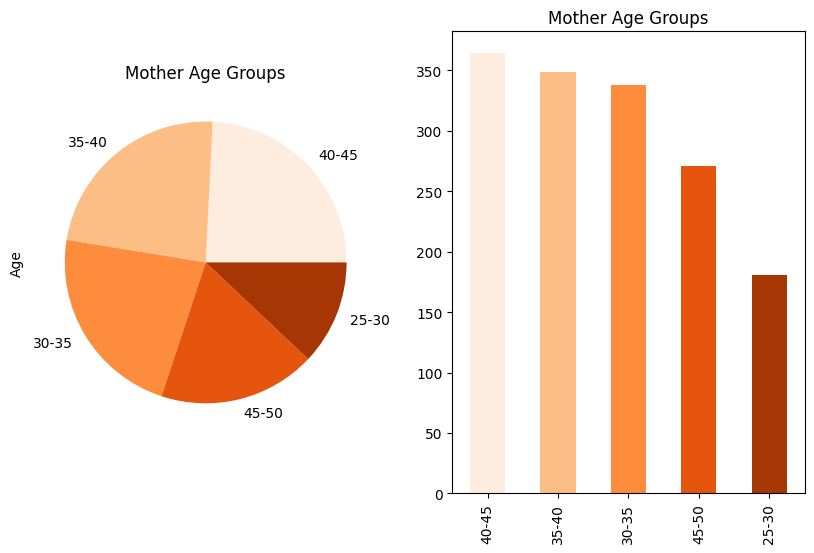

In [40]:
import matplotlib.pyplot as pp
pp.figure(figsize=(10,6))

pp.subplot(1,2,1);data.Age.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Mother Age Groups')

pp.subplot(1,2,2);data.Age.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Mother Age Groups')

Text(0.5, 1.0, 'Feeling Sad or Tearful ')

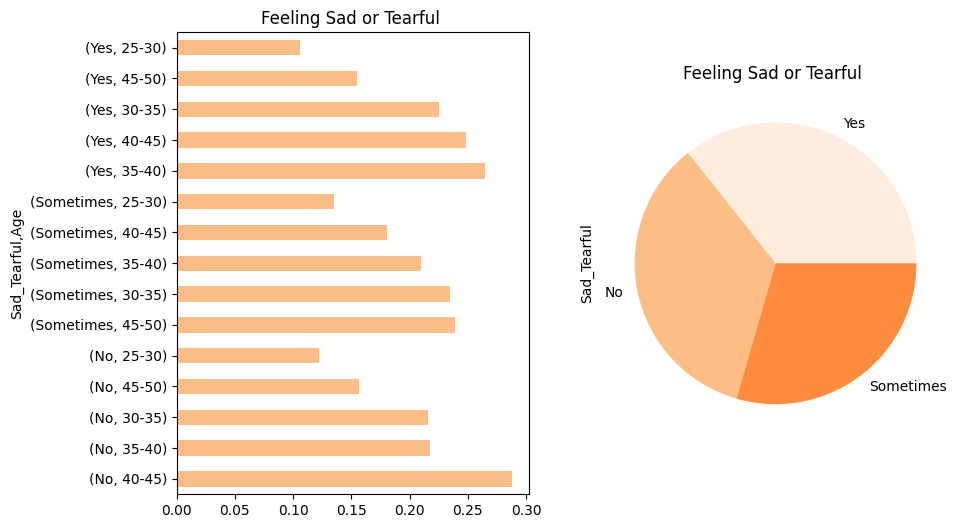

In [41]:
pp.figure(figsize=(10,6))

pp.subplot(1,2,1); sad_tearful.plot(kind='barh', color = '#fdbe85'); pp.title('Feeling Sad or Tearful ')

pp.subplot(1,2,2);data.Sad_Tearful.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling Sad or Tearful ')

#pp.subplot(1,3,2);df.Sad_Tearful.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling Sad or Tearful')

#pp.subplot(1,2,2); sad_tearful.plot(kind='barh', color = '#a63603')

Text(0.5, 1.0, 'Irritable Towards Baby & Partner ')

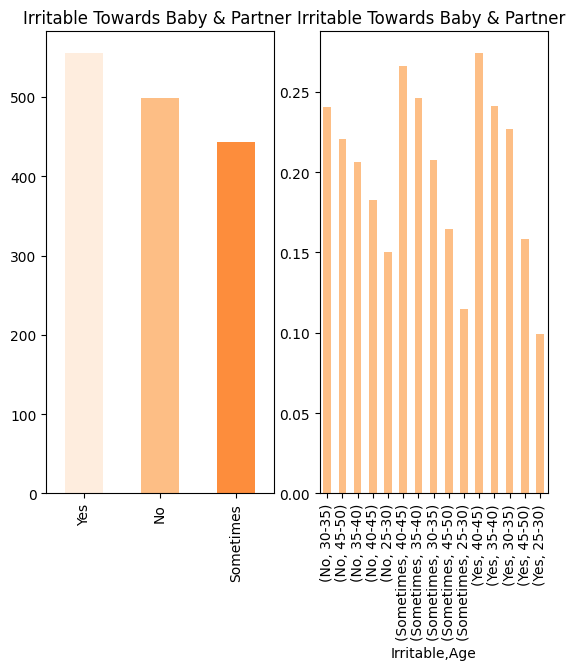

In [42]:
pp.figure(figsize=(10,6))

pp.subplot(1,3,1);data.Irritable.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Irritable Towards Baby & Partner ')

pp.subplot(1,3,2); irritable.plot(kind='bar', color = '#fdbe85'); pp.title('Irritable Towards Baby & Partner ')

Text(0.5, 1.0, 'Trouble Sleeping at Night')

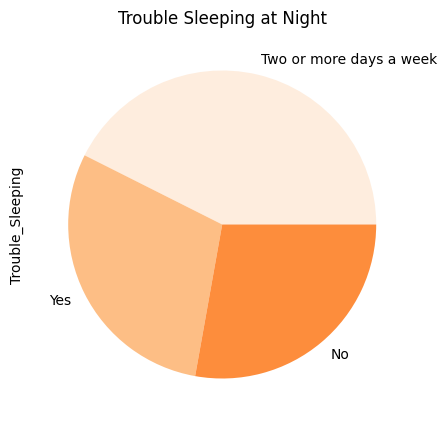

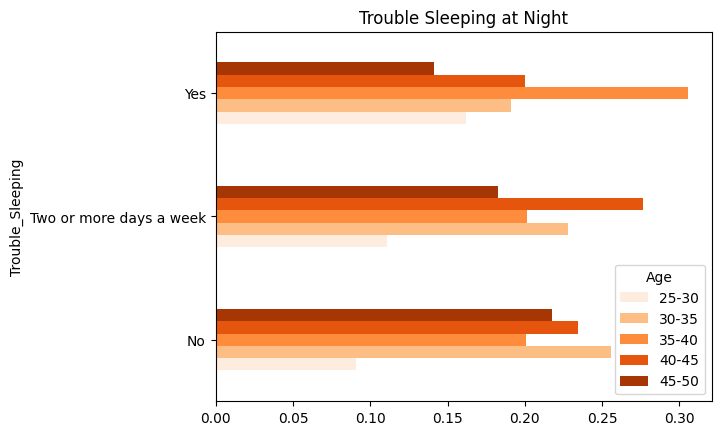

In [43]:
plt.figure(figsize = (10,5))
data.Trouble_Sleeping.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Trouble Sleeping at Night')

trouble_sleeping.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Trouble Sleeping at Night')

Text(0.5, 1.0, 'Overeating or Loss of Appetite ')

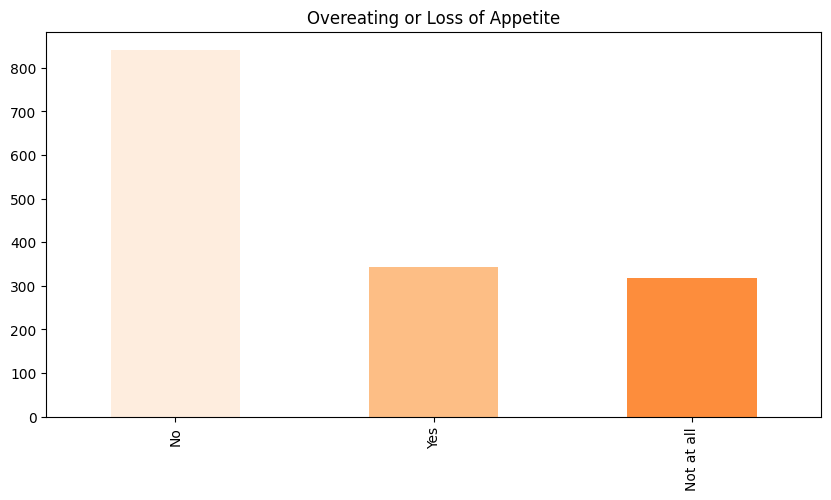

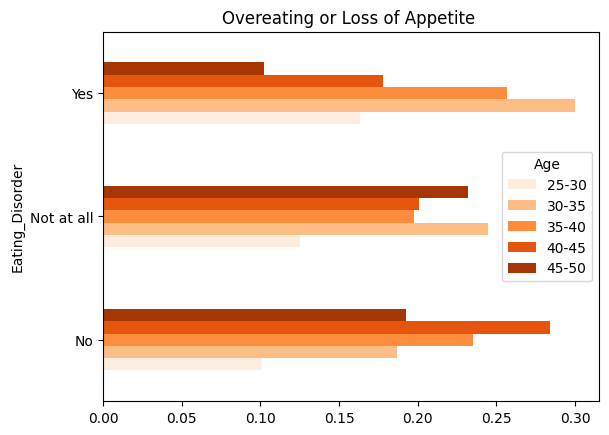

In [44]:
plt.figure(figsize = (10,5))
data.Eating_Disorder.value_counts().plot(kind='bar', color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Overeating or Loss of Appetite')

eating_disorder.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Overeating or Loss of Appetite ')

Text(0.5, 1.0, 'Problems Concentrating or Making Decisions ')

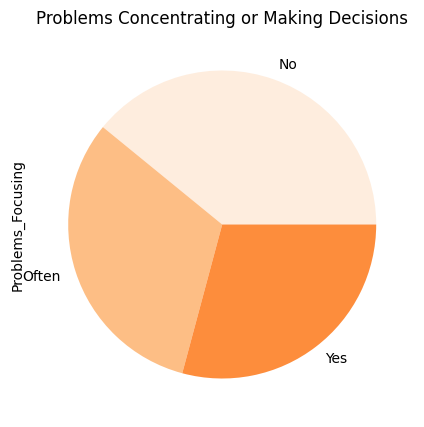

<Figure size 1000x600 with 0 Axes>

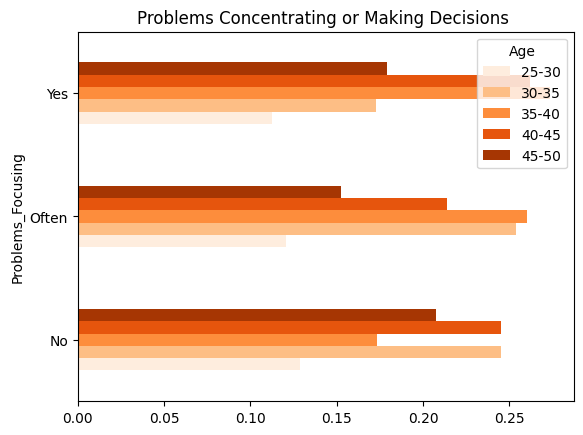

In [45]:
plt.figure(figsize = (10,5))

data.Problems_Focusing.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Problems Concentrating or Making Decisions')

plt.figure(figsize=(10,6))

problems_focusing.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Problems Concentrating or Making Decisions ')

Text(0.5, 1.0, 'Feeling of Guilt ')

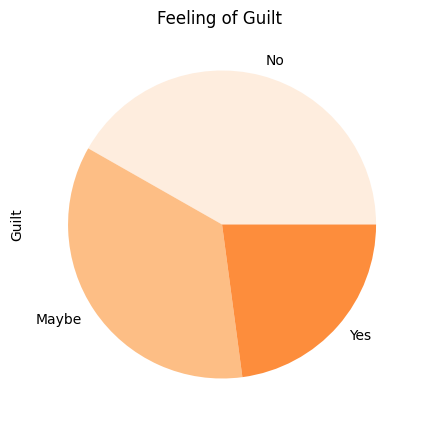

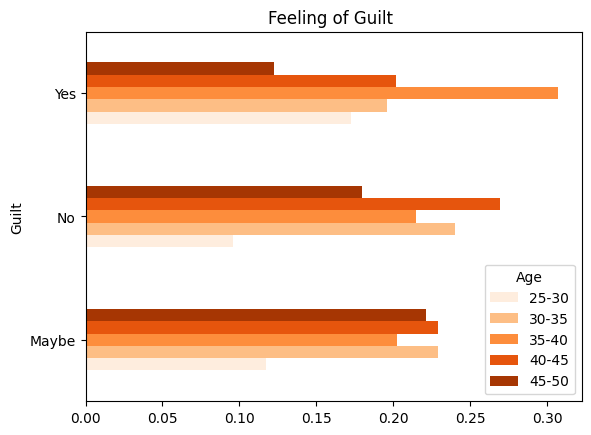

In [46]:
plt.figure(figsize = (10,5))

data.Guilt.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling of Guilt ')
guilt.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Feeling of Guilt ')

Text(0.5, 1.0, 'Problems of Bonding with Baby ')

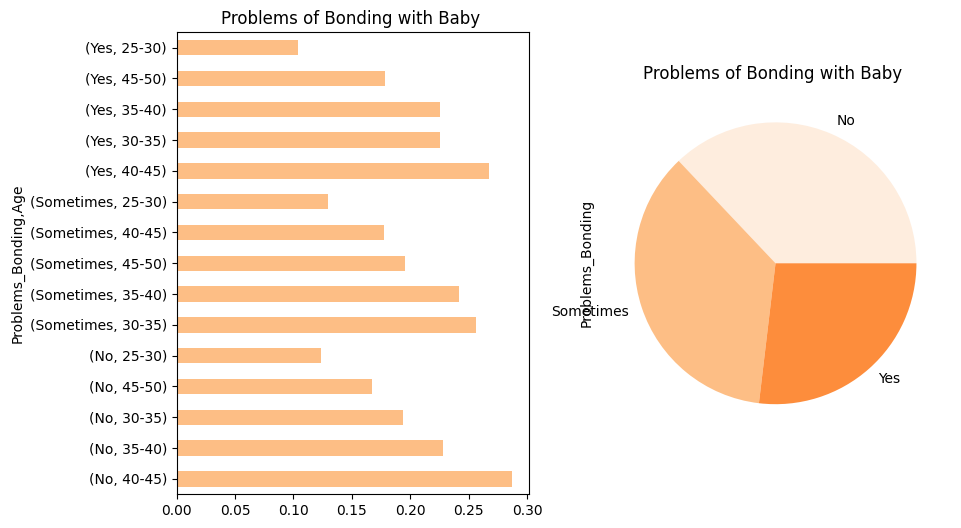

In [47]:
pp.figure(figsize=(10,6))

pp.subplot(1,2,1); problems_bonding.plot(kind='barh', color = '#fdbe85'); pp.title('Problems of Bonding with Baby ')

pp.subplot(1,2,2);data.Problems_Bonding.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Problems of Bonding with Baby ')

Text(0.5, 1.0, 'Suicide Attempt  ')

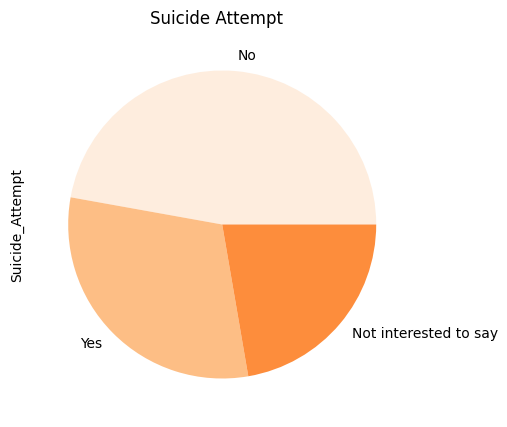

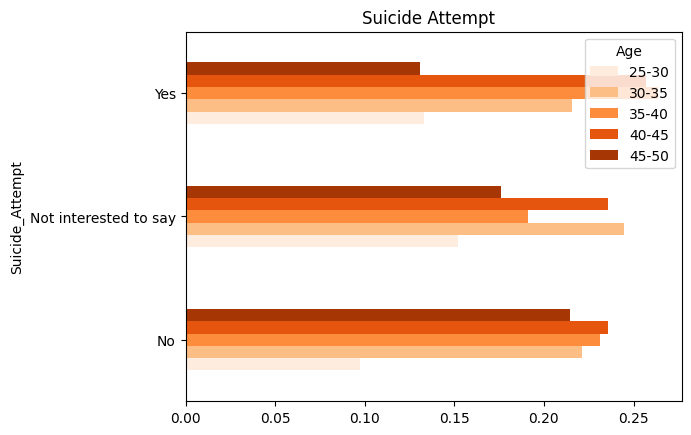

In [48]:
plt.figure(figsize = (10,5))

data.Suicide_Attempt.value_counts().plot(kind='pie', colors=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Suicide Attempt  ')
suicide_attempt.unstack().plot(kind='barh',color=['#feedde', '#fdbe85','#fd8d3c','#e6550d','#a63603']); pp.title('Suicide Attempt  ')

In [49]:
!pip install dython

In [50]:
from dython.nominal import associations

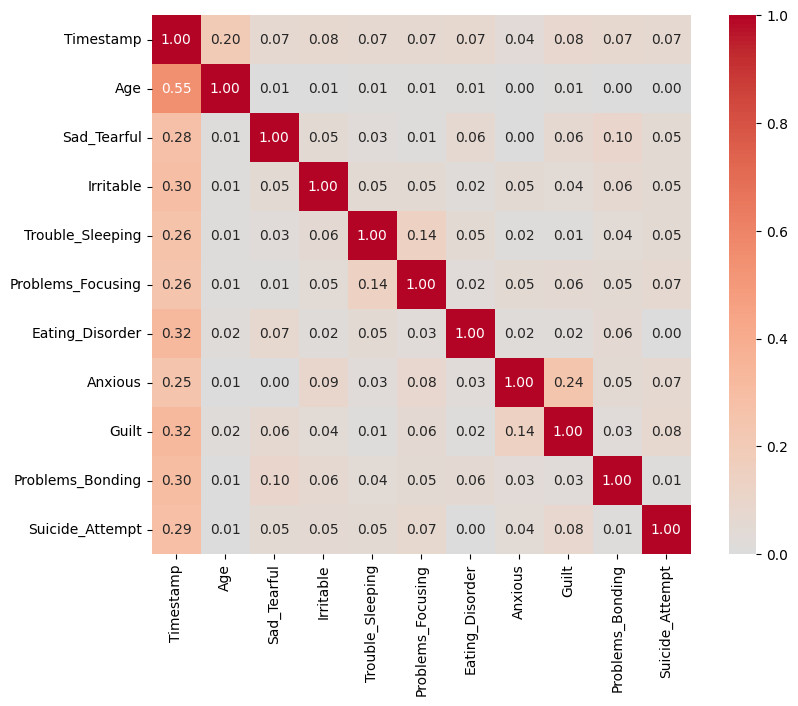

In [51]:
# Generating Theil’s U pairwise association plot
fig, ax = plt.subplots(figsize = (10, 7))

# Estimate and generate Theil's U association plot
theils_u = associations(data, nom_nom_assoc='theil', vmin=0, vmax=1, cmap="coolwarm", fmt='.2f', ax=ax)

#Apply Machine Learning ALgorithm

In [52]:
x = data.drop(columns=['Suicide_Attempt'])
y = data['Suicide_Attempt']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [53]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (1052, 10)
Y_train Shape : (1052,)
X_test  Shape : (451, 10)
Y_test  Shape : (451,)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [55]:
features = data.drop('Suicide_Attempt',axis=1)  # features are based on cleaned dataset
target = data.loc[:, 'Suicide_Attempt']

features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.3, # use 30% of data as test set
                                                                            random_state=1)

display(features_train.head())
display(features_train.shape)
display(features_test.shape)
display(target_train.shape)
display(target_test.shape)

,Timestamp,Age,Sad_Tearful,Irritable,Trouble_Sleeping,Problems_Focusing,Eating_Disorder,Anxious,Guilt,Problems_Bonding
188,6/15/2022 0:39,25-30,No,No,Two or more days a week,Yes,No,No,Maybe,No
189,6/15/2022 0:40,45-50,Yes,No,Yes,Often,No,Yes,No,Yes
1304,6/15/2022 0:29,40-45,Yes,Yes,Yes,Often,Yes,No,Maybe,No
1228,6/14/2022 23:42,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes
478,6/14/2022 22:06,40-45,Yes,Yes,Two or more days a week,No,Yes,No,No,Sometimes


(1052, 10)

(451, 10)

(1052,)

(451,)

#OneHotEncoder

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder

# Specify which columns should be transformed and by which transformer
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['Age', 'Sad_Tearful', 'Irritable',
                                                                      'Trouble_Sleeping', 'Problems_Focusing',
                                                                      'Eating_Disorder', 'Anxious', 'Guilt', 'Problems_Bonding'])])

# Fit and transform the data
features_train_transform = preprocessor.fit_transform(features_train)
features_test_transform = preprocessor.transform(features_test)
print("type==",type(features_test_transform))
# Get the feature names from the OneHotEncoder
feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=['Age', 'Sad_Tearful', 'Irritable',
                                                                                              'Trouble_Sleeping', 'Problems_Focusing',
                                                                                              'Eating_Disorder', 'Anxious', 'Guilt', 'Problems_Bonding'])

# Convert the transformed data to a dense array
features_train_transform_array = features_train_transform.toarray()
features_test_transform_array = features_test_transform.toarray()

# Create DataFrames with the transformed data and feature names
features_train_transform_df = pd.DataFrame(features_train_transform_array, columns=feature_names)
features_test_transform_df = pd.DataFrame(features_test_transform_array, columns=feature_names)

# Now, you can view these DataFrames
print(features_train_transform_df.columns)
print(features_test_transform_df.head())

type== <class 'scipy.sparse._csr.csr_matrix'>
Index(['Age_25-30', 'Age_30-35', 'Age_35-40', 'Age_40-45', 'Age_45-50',
       'Sad_Tearful_No', 'Sad_Tearful_Sometimes', 'Sad_Tearful_Yes',
       'Irritable_No', 'Irritable_Sometimes', 'Irritable_Yes', 'Irritable_nan',
       'Trouble_Sleeping_No', 'Trouble_Sleeping_Two or more days a week',
       'Trouble_Sleeping_Yes', 'Problems_Focusing_No',
       'Problems_Focusing_Often', 'Problems_Focusing_Yes',
       'Problems_Focusing_nan', 'Eating_Disorder_No',
       'Eating_Disorder_Not at all', 'Eating_Disorder_Yes', 'Anxious_No',
       'Anxious_Yes', 'Guilt_Maybe', 'Guilt_No', 'Guilt_Yes', 'Guilt_nan',
       'Problems_Bonding_No', 'Problems_Bonding_Sometimes',
       'Problems_Bonding_Yes'],
      dtype='object')
   Age_25-30  Age_30-35  Age_35-40  Age_40-45  Age_45-50  Sad_Tearful_No  \
0        0.0        1.0        0.0        0.0        0.0             1.0   
1        0.0        1.0        0.0        0.0        0.0             1.0   


In [57]:
print(features_train_transform_df.columns)

Index(['Age_25-30', 'Age_30-35', 'Age_35-40', 'Age_40-45', 'Age_45-50',
       'Sad_Tearful_No', 'Sad_Tearful_Sometimes', 'Sad_Tearful_Yes',
       'Irritable_No', 'Irritable_Sometimes', 'Irritable_Yes', 'Irritable_nan',
       'Trouble_Sleeping_No', 'Trouble_Sleeping_Two or more days a week',
       'Trouble_Sleeping_Yes', 'Problems_Focusing_No',
       'Problems_Focusing_Often', 'Problems_Focusing_Yes',
       'Problems_Focusing_nan', 'Eating_Disorder_No',
       'Eating_Disorder_Not at all', 'Eating_Disorder_Yes', 'Anxious_No',
       'Anxious_Yes', 'Guilt_Maybe', 'Guilt_No', 'Guilt_Yes', 'Guilt_nan',
       'Problems_Bonding_No', 'Problems_Bonding_Sometimes',
       'Problems_Bonding_Yes'],
      dtype='object')


#model applying

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, classification_report


# Define a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machines': SVC(kernel='linear', C=1.0),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)



}

# Loop through the models and train and test each model
for name, model in models.items():
    print('This model Name is ', name)
    model.fit(features_train_transform, target_train)
    y_pred = model.predict(features_test_transform)
    accuracy = accuracy_score(target_test, y_pred)
    print('Accuracy:', accuracy)

This model Name is  Decision Tree
Accuracy: 0.7184035476718403
This model Name is  Random Forest
Accuracy: 0.8337028824833703
This model Name is  Gradient Boosting
Accuracy: 0.9623059866962306
This model Name is  K-Nearest Neighbors
Accuracy: 0.8226164079822617
This model Name is  Support Vector Machines
Accuracy: 0.729490022172949
This model Name is  Neural Networks
Accuracy: 0.9578713968957872


In [59]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0)

# Create the Grid Search Cross-Validation object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to your training data
grid_search.fit(features_train_transform, target_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Test the best model on the test data
y_pred = best_model.predict(features_test_transform)
accuracy = accuracy_score(target_test, y_pred)
print('Best Model Accuracy:', accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Model Accuracy: 0.9645232815964523


#apply hyperparameter for improve better accuracy

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define a dictionary of models and their respective hyperparameters
models = {
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Gradient Boosting': (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.2]
    }),

    'Support Vector Machines': (SVC(), {
        'C': [0.1, 1.0, 10.0],
        'kernel': ['linear', 'rbf']
    }),
    'Neural Networks': (MLPClassifier(), {
        'hidden_layer_sizes': [(50,), (100,), (150,)],
        'activation': ['relu', 'tanh'],
        'solver': ['adam'],
        'max_iter': [1000]
    }),

}

# Initialize variables to store the best model and its score
best_model = None
best_score = 0

# Loop through the models and perform hyperparameter tuning
for model_name, (model, param_grid) in models.items():
    print(f"Model: {model_name}")
    # Convert sparse matrix to dense array for GridSearchCV
    features_train_dense = features_train_transform.toarray()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=make_scorer(accuracy_score))
    grid_search.fit(features_train_dense, target_train)
    accuracy = grid_search.best_score_

    if accuracy > best_score:
        best_score = accuracy
        best_model = model_name

    print(f"Best Accuracy: {accuracy:.4f}")
    print(f"Best Hyperparameters: {grid_search.best_params_}\n")

print(f"The best model is: {best_model} with an accuracy of {best_score:.4f}")


Model: Decision Tree
Best Accuracy: 0.9183
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: Random Forest
Best Accuracy: 0.9325
Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}

Model: Gradient Boosting
Best Accuracy: 0.9287
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 150}

Model: Support Vector Machines
Best Accuracy: 0.9268
Best Hyperparameters: {'C': 10.0, 'kernel': 'rbf'}

Model: Neural Networks


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Accuracy: 0.9278
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (150,), 'max_iter': 1000, 'solver': 'adam'}

The best model is: Random Forest with an accuracy of 0.9325


This model Name is  Decision Tree
Accuracy: 0.7184035476718403


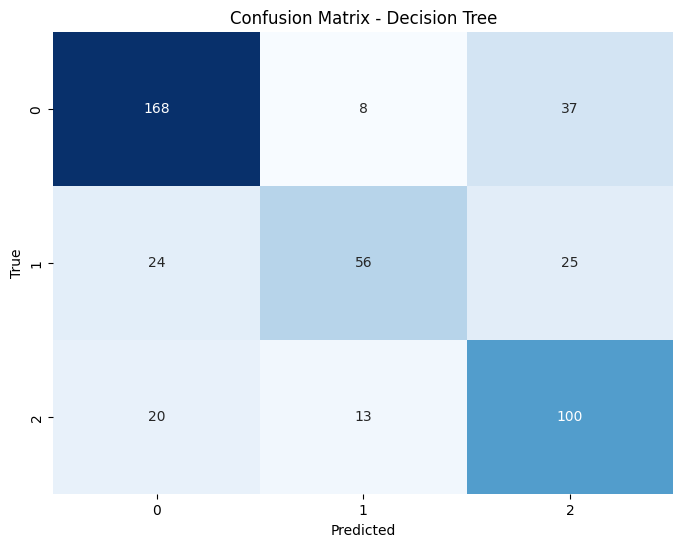

This model Name is  Random Forest
Accuracy: 0.8337028824833703


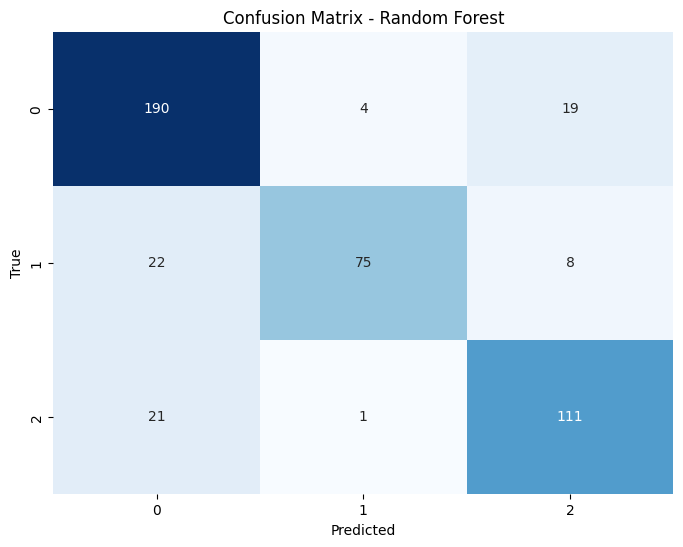

This model Name is  Gradient Boosting
Accuracy: 0.9623059866962306


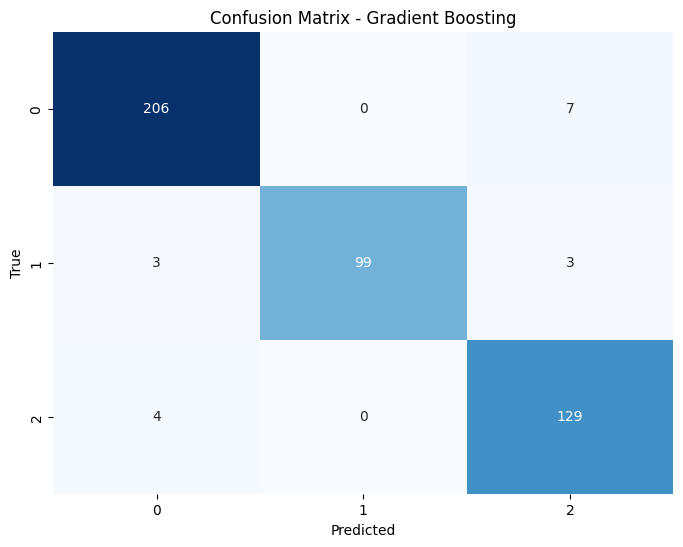

This model Name is  K-Nearest Neighbors
Accuracy: 0.8226164079822617


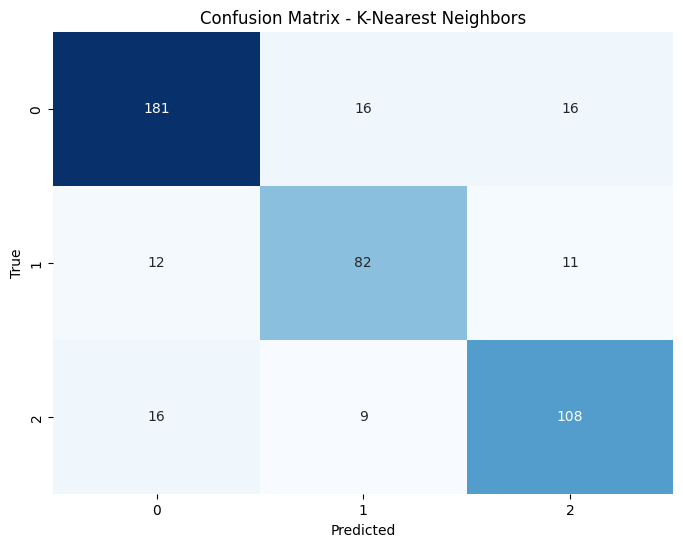

This model Name is  Support Vector Machines
Accuracy: 0.729490022172949


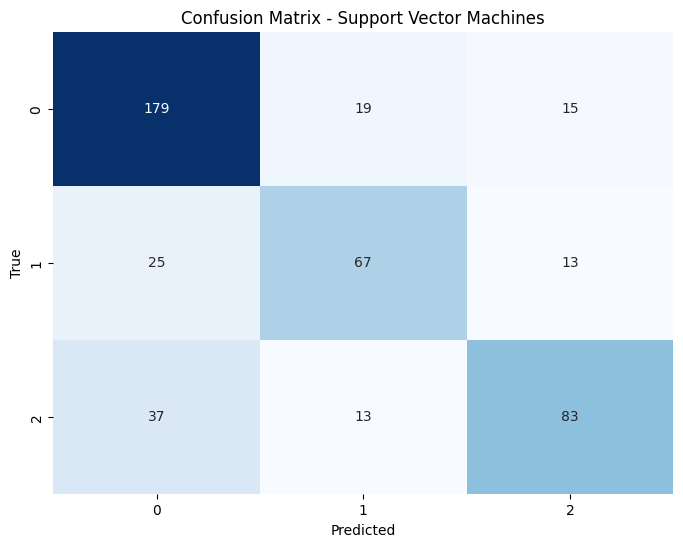

This model Name is  Neural Networks
Accuracy: 0.9600886917960089


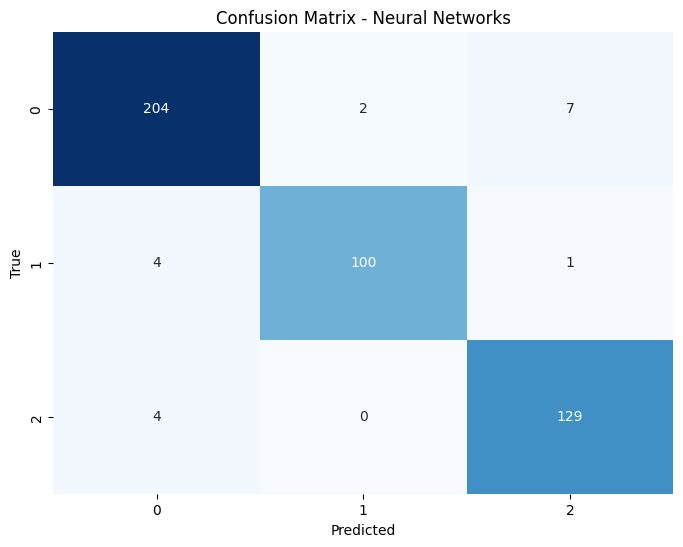

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machines': SVC(kernel='linear', C=1.0),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000),

}

# Loop through the models and train and test each model
for name, model in models.items():
    print('This model Name is ', name)
    model.fit(features_train_transform, target_train)
    y_pred = model.predict(features_test_transform)
    accuracy = accuracy_score(target_test, y_pred)
    print('Accuracy:', accuracy)

    # Calculate the confusion matrix
    cm = confusion_matrix(target_test, y_pred)

    # Display the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [62]:
from sklearn.metrics import classification_report

# Define a dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machines': SVC(kernel='linear', C=1.0),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', max_iter=1000)

}

# Loop through the models and train and test each model
for name, model in models.items():
    print('This model Name is ', name)
    model.fit(features_train_transform, target_train)
    y_pred = model.predict(features_test_transform)
    accuracy = accuracy_score(target_test, y_pred)
    print('Accuracy:', accuracy)

    # Calculate the classification report
    report = classification_report(target_test, y_pred)
    print('Classification Report:')
    print(report)


This model Name is  Decision Tree
Accuracy: 0.7184035476718403
Classification Report:
                       precision    recall  f1-score   support

                   No       0.79      0.79      0.79       213
Not interested to say       0.73      0.53      0.62       105
                  Yes       0.62      0.75      0.68       133

             accuracy                           0.72       451
            macro avg       0.71      0.69      0.69       451
         weighted avg       0.73      0.72      0.72       451

This model Name is  Random Forest
Accuracy: 0.8337028824833703
Classification Report:
                       precision    recall  f1-score   support

                   No       0.82      0.89      0.85       213
Not interested to say       0.94      0.71      0.81       105
                  Yes       0.80      0.83      0.82       133

             accuracy                           0.83       451
            macro avg       0.85      0.81      0.83       451
    

In [63]:
from sklearn.metrics import accuracy_score

# Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machines': SVC(kernel='linear', C=1.0),
    'Neural Networks': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000),

}

# Create dictionaries to store accuracy and validation accuracy for each model
accuracy_results = {}
validation_accuracy_results = {}

# Loop through the models
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(features_train_transform, target_train)

    # Make predictions on the test data
    predictions = model.predict(features_test_transform)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(target_test, predictions)
    accuracy_results[model_name] = accuracy

    # Optionally, you can calculate validation accuracy on the training data
    validation_predictions = model.predict(features_train_transform)
    validation_accuracy = accuracy_score(target_train, validation_predictions)
    validation_accuracy_results[model_name] = validation_accuracy

# Print the accuracy and validation accuracy for each model
for model_name, accuracy in accuracy_results.items():
    print(f'{model_name} - Accuracy: {accuracy:.2f}')

# Optionally, print the validation accuracy
for model_name, validation_accuracy in validation_accuracy_results.items():
    print(f'{model_name} - Validation Accuracy: {validation_accuracy:.2f}')


Decision Tree - Accuracy: 0.72
Random Forest - Accuracy: 0.83
Gradient Boosting - Accuracy: 0.96
K-Nearest Neighbors - Accuracy: 0.82
Support Vector Machines - Accuracy: 0.73
Neural Networks - Accuracy: 0.95
Decision Tree - Validation Accuracy: 0.81
Random Forest - Validation Accuracy: 0.87
Gradient Boosting - Validation Accuracy: 1.00
K-Nearest Neighbors - Validation Accuracy: 0.90
Support Vector Machines - Validation Accuracy: 0.78
Neural Networks - Validation Accuracy: 1.00


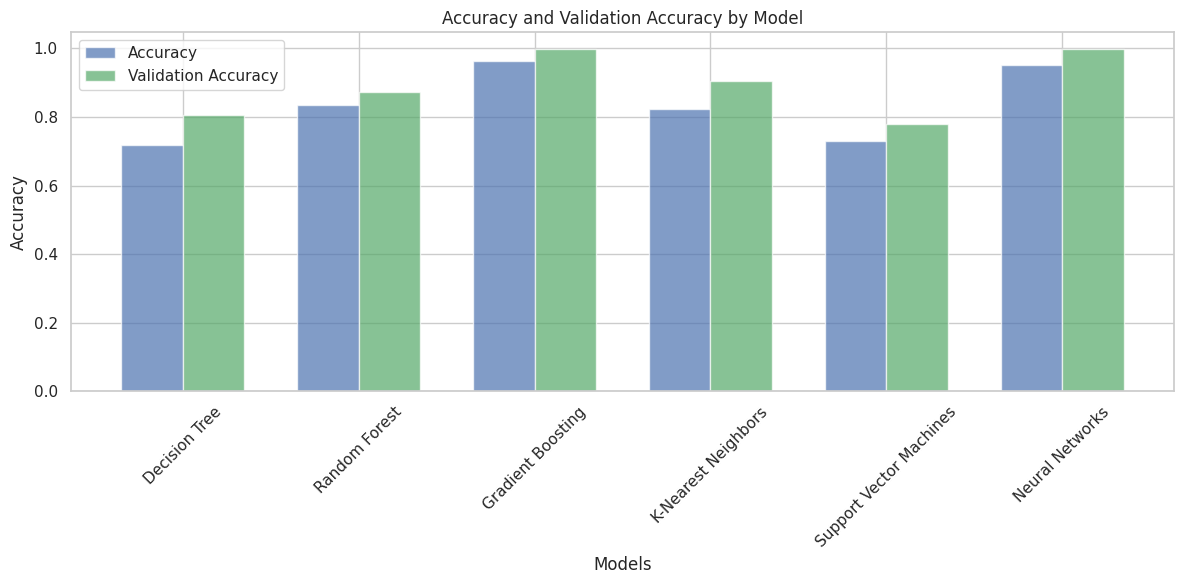

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their corresponding accuracy metrics
models = [
    'Decision Tree', 'Random Forest', 'Gradient Boosting', #'Naive Bayes',
    'K-Nearest Neighbors', 'Support Vector Machines', 'Neural Networks'
]

accuracy = [accuracy_results[model] for model in models]
validation_accuracy = [validation_accuracy_results[model] for model in models]

# Create a bar chart for accuracy and validation accuracy
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
bar_width = 0.35
index = range(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy', color='b', alpha=0.7)
plt.bar([i + bar_width for i in index], validation_accuracy, bar_width, label='Validation Accuracy', color='g', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy and Validation Accuracy by Model')
plt.xticks([i + bar_width / 2 for i in index], models, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()


# testing

In [65]:
# Load the trained model and preprocessor
import joblib
import pickle




In [66]:
data.columns


Index(['Timestamp', 'Age', 'Sad_Tearful', 'Irritable', 'Trouble_Sleeping',
       'Problems_Focusing', 'Eating_Disorder', 'Anxious', 'Guilt',
       'Problems_Bonding', 'Suicide_Attempt'],
      dtype='object')

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [68]:
features_train_transform[0][0]

<1x31 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Declare variables manually
Age = 50
Sad_Tearful = 'No'
Irritable = ''
Trouble_Sleeping = 'No'
Problems_Focusing = 'Often'
Eating_Disorder = 'No'
Anxious = 'Yes'
Guilt = ''
Problems_Bonding = 'No'



# Set the values based on the manual encoding, sequence of values matters alot here,
#so it should be kept as it is
list1=[]
# Age
list1.append(1 if Age >= 25 or Age < 30 else 0)
list1.append(1 if Age >= 30 or Age < 35 else 0)
list1.append(1 if Age >= 35 or Age < 40 else 0)
list1.append(1 if Age >= 40 or Age < 45 else 0)
list1.append(1 if Age >= 45 or Age <= 50 else 0)

# Sad_Tearful
list1.append(1 if Sad_Tearful == 'No' else 0)
list1.append(1 if Sad_Tearful == 'Sometimes' else 0)
list1.append(1 if Sad_Tearful == 'Yes' else 0)

# Irritable
list1.append(1 if Irritable == 'No' else 0)
list1.append(1 if Irritable == 'Sometimes' else 0)
list1.append(1 if Irritable == 'Yes' else 0)
list1.append(1 if Irritable == '' else 0)

# Trouble_Sleeping
list1.append(1 if Trouble_Sleeping == 'No' else 0)
list1.append(1 if Trouble_Sleeping == 'Two or more days a week' else 0)
list1.append(1 if Trouble_Sleeping == 'Yes' else 0)

# Problems_Focusing
list1.append(1 if Problems_Focusing == 'No' else 0)
list1.append(1 if Problems_Focusing == 'Often' else 0)
list1.append(1 if Problems_Focusing == 'Yes' else 0)
list1.append(1 if Problems_Focusing == '' else 0)

# Eating_Disorder
list1.append(1 if Eating_Disorder == 'No' else 0)
list1.append(1 if Eating_Disorder == 'Not at all' else 0)
list1.append(1 if Eating_Disorder == 'Yes' else 0)

# Anxious
list1.append(1 if Anxious == 'No' else 0)
list1.append(1 if Anxious == 'Yes' else 0)

# Guilt
list1.append(1 if Guilt == 'Maybe' else 0)
list1.append(1 if Guilt == 'No' else 0)
list1.append(1 if Guilt == 'Yes' else 0)
list1.append(1 if Guilt == '' else 0)

# Problems_Bonding
list1.append(1 if Problems_Bonding == 'No' else 0)
list1.append(1 if Problems_Bonding == 'Sometimes' else 0)
list1.append(1 if Problems_Bonding == 'Yes' else 0)



#Make gradient boosting model like above and train it before saving
model_123= GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)

model_123.fit(features_train_transform, target_train)

#Dump this gradient boosting model and then download it
import pickle
pickle.dump(model_123, open("pima.pickle.dat", "wb"))



predictions = model_123.predict([list1])
print(predictions)


['No']


In [70]:
display(features_train_transform[1].toarray())

array([[0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.]])

# Here we test for first row that predict right

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Declare variables manually
Age = 40
Sad_Tearful = 'Yes'
Irritable = 'Yes'
Trouble_Sleeping = 'Two or more days a week'
Problems_Focusing = 'Yes'
Eating_Disorder = 'No'
Anxious = 'Yes'
Guilt = 'No'
Problems_Bonding = 'Yes'



# Set the values based on the manual encoding, sequence of values matters alot here,
#so it should be kept as it is
list1=[]
# Age
list1.append(1 if Age >= 25 or Age < 30 else 0)
list1.append(1 if Age >= 30 or Age < 35 else 0)
list1.append(1 if Age >= 35 or Age < 40 else 0)
list1.append(1 if Age >= 40 or Age < 45 else 0)
list1.append(1 if Age >= 45 or Age <= 50 else 0)

# Sad_Tearful
list1.append(1 if Sad_Tearful == 'No' else 0)
list1.append(1 if Sad_Tearful == 'Sometimes' else 0)
list1.append(1 if Sad_Tearful == 'Yes' else 0)

# Irritable
list1.append(1 if Irritable == 'No' else 0)
list1.append(1 if Irritable == 'Sometimes' else 0)
list1.append(1 if Irritable == 'Yes' else 0)
list1.append(1 if Irritable == '' else 0)

# Trouble_Sleeping
list1.append(1 if Trouble_Sleeping == 'No' else 0)
list1.append(1 if Trouble_Sleeping == 'Two or more days a week' else 0)
list1.append(1 if Trouble_Sleeping == 'Yes' else 0)

# Problems_Focusing
list1.append(1 if Problems_Focusing == 'No' else 0)
list1.append(1 if Problems_Focusing == 'Often' else 0)
list1.append(1 if Problems_Focusing == 'Yes' else 0)
list1.append(1 if Problems_Focusing == '' else 0)

# Eating_Disorder
list1.append(1 if Eating_Disorder == 'No' else 0)
list1.append(1 if Eating_Disorder == 'Not at all' else 0)
list1.append(1 if Eating_Disorder == 'Yes' else 0)

# Anxious
list1.append(1 if Anxious == 'No' else 0)
list1.append(1 if Anxious == 'Yes' else 0)

# Guilt
list1.append(1 if Guilt == 'Maybe' else 0)
list1.append(1 if Guilt == 'No' else 0)
list1.append(1 if Guilt == 'Yes' else 0)
list1.append(1 if Guilt == '' else 0)

# Problems_Bonding
list1.append(1 if Problems_Bonding == 'No' else 0)
list1.append(1 if Problems_Bonding == 'Sometimes' else 0)
list1.append(1 if Problems_Bonding == 'Yes' else 0)



#Make gradient boosting model like above and train it before saving
model_123= GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=0)

model_123.fit(features_train_transform, target_train)

#Dump this gradient boosting model and then download it
import pickle
pickle.dump(model_123, open("pima.pickle.dat", "wb"))



predictions = model_123.predict([list1])
print(predictions)


['Yes']
